# Setup

In [11]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [3]:
con = sqlite3.connect('../data/database.db')
df = pd.read_sql_query('SELECT * FROM disp;', con, index_col='id')
df.head()

,clientId,accountId,type
id,,,
1,1,1,OWNER
2,2,2,OWNER
3,3,2,DISPONENT
4,4,3,OWNER
5,5,3,DISPONENT


# Analysing type distribution

In [4]:
print(df['type'].unique())

['OWNER' 'DISPONENT']


(array([0, 1]), [Text(0, 0, 'OWNER'), Text(1, 0, 'DISPONENT')])

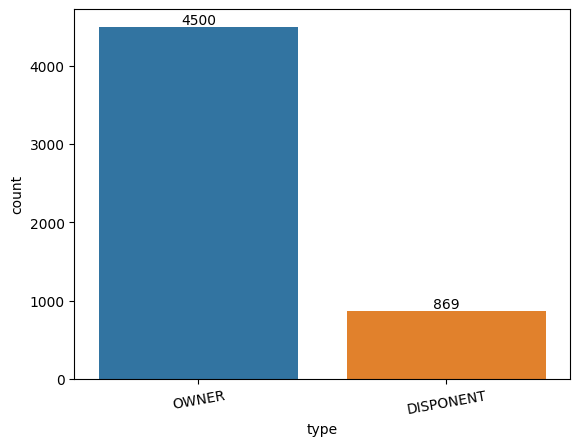

In [5]:
ax = sns.countplot(df, x='type')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=10)

The type `OWNER` is more than 5 times more common that the `DISPONENT` type.

# Analysing accounts and clients

In [6]:
grouped_clients = pd.read_sql_query('SELECT clientId, COUNT(*) AS cnt FROM disp GROUP BY clientId;', con)
print("Number of clients that have multiple accounts:", len(grouped_clients[grouped_clients['cnt'] > 1]))

Number of clients that have multiple accounts: 0


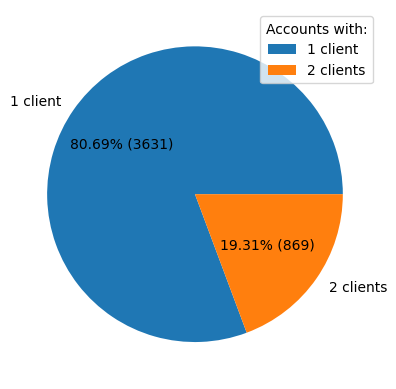

In [24]:
grouped_accounts = pd.read_sql_query('SELECT accountId, COUNT(*) AS cnt FROM disp GROUP BY accountId;', con)

x = [len(grouped_accounts[grouped_accounts['cnt'] == 1]), len(grouped_accounts[grouped_accounts['cnt'] == 2])]

plt.pie(x, labels=["1 client", "2 clients"], autopct=lambda p: '{:.2f}% ({:.0f})'.format(p,(p/100)*sum(x)))
plt.legend(title="Accounts with:")
plt.show()

# Multiple clients accounts and loans correlation

In [8]:
ac_loan = pd.read_sql_query('SELECT DISTINCT loanDev.id, loanDev.accountId, status FROM disp INNER JOIN loanDev ON disp.accountId = loanDev.accountId WHERE DISP.type LIKE "DISPONENT";', con)
print(ac_loan.head())
print("Number of paid loans that have multiple accounts:", len(ac_loan[ac_loan['status'] > 0]))

     id  accountId  status
0  4959          2       1
1  4996        132       1
2  5002        173       1
3  5125        789       1
4  5148        940       1
Number of paid loans that have multiple accounts: 75
